In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

In [ ]:
import pandas as pd
dataset = pd.read_csv('dataset_band_gap_features_selected.csv')
dataset.head()

,material_id,formula,band_gap,volume,poly_electronic,poly_total,minimum CN_VoronoiNN,mean CN_VoronoiNN,min relative bond length,minimum neighbor distance variation,mean ordering parameter shell 3,max packing efficiency,maximum local difference in MeltingT,range local difference in MeltingT,avg_dev local difference in MeltingT,minimum local difference in Column,range local difference in Column,maximum local difference in Electronegativity,range local difference in Electronegativity,avg_dev local difference in Electronegativity,avg_dev local difference in NsValence,maximum local difference in NdValence,mean local difference in NdValence,avg_dev local difference in NsUnfilled,maximum local difference in NpUnfilled,range local difference in NpUnfilled,maximum local difference in NUnfilled,range local difference in NUnfilled,maximum local difference in GSbandgap,range local difference in GSbandgap,range local difference in SpaceGroupNumber,MagpieData maximum Number,MagpieData maximum MendeleevNumber,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData mode MeltingT,MagpieData maximum Column,MagpieData avg_dev Column,MagpieData maximum Row,MagpieData mean Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData mean CovalentRadius,MagpieData mode CovalentRadius,MagpieData maximum Electronegativity,MagpieData mean Electronegativity,MagpieData mode Electronegativity,MagpieData maximum NpValence,MagpieData mode NpValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData maximum NUnfilled,MagpieData mean NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,frac s valence electrons,frac p valence electrons,frac d valence electrons,compound possible
0,mp-441,Rb2Te,1.88,159.501208,3.44,6.23,8.000000,9.314539,0.944114,4.574309e-08,0.053132,0.510131,410.200000,2.354349e+02,1.046377e+02,6.390728,8.609272e+00,1.280000,7.346579e-01,3.265146e-01,0.25509,10.000000,6.173657,0.25509,2.000000,1.147903e+00,1.000000,5.739515e-01,0.46400,2.663135e-01,44.194265,52.0,90.0,312.46,722.66,410.20,449.193333,312.46,16.0,6.666667,5.0,5.000000,5.0,138.0,220.0,192.666667,220.0,2.10,1.246667,0.82,4.0,0.0,10.0,10.0,3.333333,4.444444,2.0,2.0,2.0,1.333333,34.763333,0.464,0.464,0.154667,0.222222,0.222222,0.555556,True
1,mp-22881,CdCl2,3.52,84.298097,3.16,6.73,6.005276,9.258333,0.833111,7.214204e-04,0.078179,0.359239,422.620000,2.579218e+02,1.146319e+02,1.948538,3.051462e+00,1.470000,8.971298e-01,3.987244e-01,0.00000,10.000000,5.931384,0.00000,1.000000,6.102924e-01,1.000000,6.102924e-01,2.49300,1.521459e+00,79.338011,48.0,94.0,171.60,594.22,422.62,312.473333,171.60,17.0,2.222222,5.0,3.666667,3.0,102.0,144.0,116.000000,102.0,3.16,2.670000,3.16,5.0,5.0,10.0,10.0,3.333333,4.444444,1.0,1.0,1.0,0.666667,19.495000,2.493,2.493,1.662000,0.230769,0.384615,0.384615,True
2,mp-28013,MnI2,1.17,108.335875,4.97,10.64,6.000000,9.189554,0.833534,4.476379e-07,0.078672,0.360542,1132.150000,6.936517e+02,3.082896e+02,3.873147,6.126853e+00,1.110000,6.800807e-01,3.022581e-01,0.00000,5.000000,2.957716,0.00000,1.000000,6.126853e-01,4.000000,2.450741e+00,1.06200,6.506718e-01,93.740856,53.0,96.0,386.85,1519.00,1132.15,764.233333,386.85,17.0,4.444444,5.0,4.666667,5.0,139.0,139.0,139.000000,139.0,2.66,2.290000,2.66,5.0,5.0,10.0,5.0,8.333333,2.222222,1.0,1.0,5.0,2.333333,10.487586,1.062,1.062,0.708000,0.146341,0.243902,0.609756,True
3,mp-567290,LaN,1.12,88.162562,7.04,17.99,5.169234,5.169234,1.000000,1.181194e-01,0.617087,0.346123,1064.642171,6.821210e-13,1.705303e-13,11.306435,5.329071e-15,1.827874,8.881784e-16,2.775558e-16,0.00000,0.942203,0.942203,0.00000,2.826609,1.332268e-15,5.653217,2.664535e-15,6.06496,1.776357e-15,0.000000,57.0,82.0,63.05,1193.00,1129.95,628.025000,63.05,15.0,6.000000

In [ ]:
unwanted_columns = ['material_id', 'formula']
data = dataset
dataset = dataset.drop(unwanted_columns, axis=1)

dataset.head()

,band_gap,volume,poly_electronic,poly_total,minimum CN_VoronoiNN,mean CN_VoronoiNN,min relative bond length,minimum neighbor distance variation,mean ordering parameter shell 3,max packing efficiency,maximum local difference in MeltingT,range local difference in MeltingT,avg_dev local difference in MeltingT,minimum local difference in Column,range local difference in Column,maximum local difference in Electronegativity,range local difference in Electronegativity,avg_dev local difference in Electronegativity,avg_dev local difference in NsValence,maximum local difference in NdValence,mean local difference in NdValence,avg_dev local difference in NsUnfilled,maximum local difference in NpUnfilled,range local difference in NpUnfilled,maximum local difference in NUnfilled,range local difference in NUnfilled,maximum local difference in GSbandgap,range local difference in GSbandgap,range local difference in SpaceGroupNumber,MagpieData maximum Number,MagpieData maximum MendeleevNumber,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData mode MeltingT,MagpieData maximum Column,MagpieData avg_dev Column,MagpieData maximum Row,MagpieData mean Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData mean CovalentRadius,MagpieData mode CovalentRadius,MagpieData maximum Electronegativity,MagpieData mean Electronegativity,MagpieData mode Electronegativity,MagpieData maximum NpValence,MagpieData mode NpValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData maximum NUnfilled,MagpieData mean NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,frac s valence electrons,frac p valence electrons,frac d valence electrons,compound possible
0,1.88,159.501208,3.44,6.23,8.000000,9.314539,0.944114,4.574309e-08,0.053132,0.510131,410.200000,2.354349e+02,1.046377e+02,6.390728,8.609272e+00,1.280000,7.346579e-01,3.265146e-01,0.25509,10.000000,6.173657,0.25509,2.000000,1.147903e+00,1.000000,5.739515e-01,0.46400,2.663135e-01,44.194265,52.0,90.0,312.46,722.66,410.20,449.193333,312.46,16.0,6.666667,5.0,5.000000,5.0,138.0,220.0,192.666667,220.0,2.10,1.246667,0.82,4.0,0.0,10.0,10.0,3.333333,4.444444,2.0,2.0,2.0,1.333333,34.763333,0.464,0.464,0.154667,0.222222,0.222222,0.555556,True
1,3.52,84.298097,3.16,6.73,6.005276,9.258333,0.833111,7.214204e-04,0.078179,0.359239,422.620000,2.579218e+02,1.146319e+02,1.948538,3.051462e+00,1.470000,8.971298e-01,3.987244e-01,0.00000,10.000000,5.931384,0.00000,1.000000,6.102924e-01,1.000000,6.102924e-01,2.49300,1.521459e+00,79.338011,48.0,94.0,171.60,594.22,422.62,312.473333,171.60,17.0,2.222222,5.0,3.666667,3.0,102.0,144.0,116.000000,102.0,3.16,2.670000,3.16,5.0,5.0,10.0,10.0,3.333333,4.444444,1.0,1.0,1.0,0.666667,19.495000,2.493,2.493,1.662000,0.230769,0.384615,0.384615,True
2,1.17,108.335875,4.97,10.64,6.000000,9.189554,0.833534,4.476379e-07,0.078672,0.360542,1132.150000,6.936517e+02,3.082896e+02,3.873147,6.126853e+00,1.110000,6.800807e-01,3.022581e-01,0.00000,5.000000,2.957716,0.00000,1.000000,6.126853e-01,4.000000,2.450741e+00,1.06200,6.506718e-01,93.740856,53.0,96.0,386.85,1519.00,1132.15,764.233333,386.85,17.0,4.444444,5.0,4.666667,5.0,139.0,139.0,139.000000,139.0,2.66,2.290000,2.66,5.0,5.0,10.0,5.0,8.333333,2.222222,1.0,1.0,5.0,2.333333,10.487586,1.062,1.062,0.708000,0.146341,0.243902,0.609756,True
3,1.12,88.162562,7.04,17.99,5.169234,5.169234,1.000000,1.181194e-01,0.617087,0.346123,1064.642171,6.821210e-13,1.705303e-13,11.306435,5.329071e-15,1.827874,8.881784e-16,2.775558e-16,0.00000,0.942203,0.942203,0.00000,2.826609,1.332268e-15,5.653217,2.664535e-15,6.06496,1.776357e-15,0.000000,57.0,82.0,63.05,1193.00,1129.95,628.025000,63.05,15.0,6.000000,6.0,4.000000,2.0,71.0,207.0,139.000000,71.0,3.04,2.070000,1.10,3.0,0.0,1.0,

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = dataset.drop(columns='band_gap',axis=1)
X = x.values
X = scaler.fit_transform(X)
y = dataset['band_gap'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
reg = ExtraTreesRegressor(n_estimators=200, random_state=1).fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

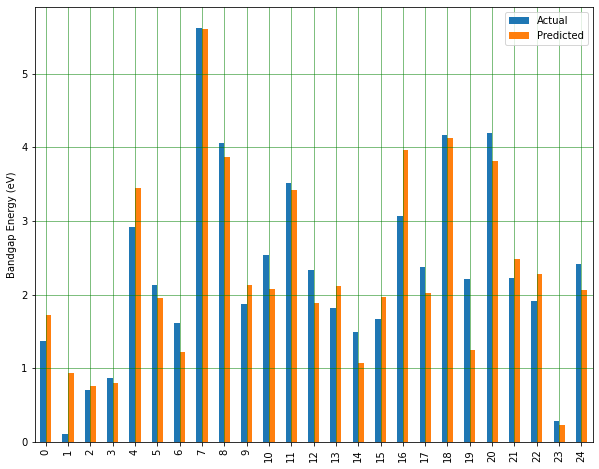

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Bandgap Energy (eV)')
plt.show()

In [ ]:
print('R^2               :', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2               : 0.9477994306970087
Mean Absolute Error: 0.3460922779922781
Mean Squared Error: 0.23499612654440163
Root Mean Squared Error: 0.4847639905607693


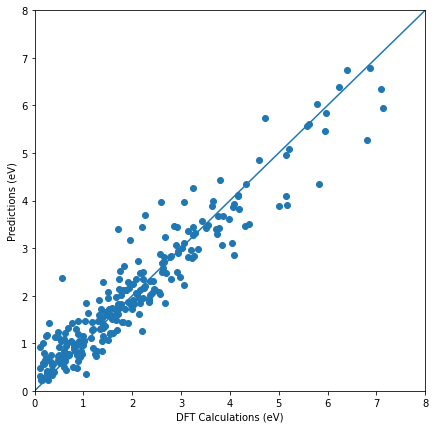

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred)
plt.xlabel('DFT Calculations (eV)')
plt.ylabel('Predictions (eV)')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

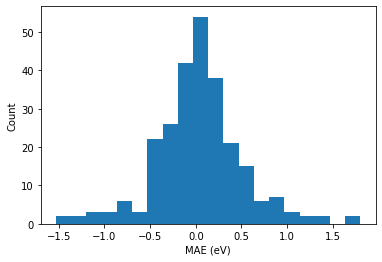

In [ ]:
error = y_pred - y_test
plt.hist(error, bins = 20)
plt.xlabel("MAE (eV)")
_ = plt.ylabel("Count")